# Задание 2 по курсу «Байесовский выбор моделей»

## Задача 1

Пусть имеется обучающая и тестовая выборки $(X_{train}, y_{train}), X_{train} \in \mathbb{R}^{m_1 \times n}, y_{train} \in \{-1, 1\}^{m_1}; (X_{test}, y_{test}), X_{test} \in \mathbb{R}^{m_2 \times n}, y_{test} \in \{-1, 1\}^{m_2}$, полученные из общей модели генерации данных с совместым правдоподобием:

$$
p(y, w, X|A) = \prod_{i} \mathcal{N} \left(x_i|0, \sigma^2I_n \right) \mathcal{N} \left(w|0, A^{-1} \right) \prod_{j} p \left(y_j | x_j, w \right)
$$, 
где $p(y_j|x_j, w)$ дается моделью логистической регрессии, т.е.:
$$
\mathbb{P}(y_j = 1) = \frac{1}{1+exp(-w^Tx_j)}
$$

1. Выписать формулу для апостериорного распределения $p(w|X_{train}, y_{train}, A)$ и получить его нормальную аппроксимацию $p(w|X_{train}, y_{train}, A) \approx \mathcal{N}(w_0, H_0^{-1})$

$$
p(w|X_{train}, y_{train}, A) = \frac{p(y_{train}, w|X_{train})}{p(y_{train}|X_{train}, A)} = \frac{p(y_{train}|X_{train}, w) p(w|A)}{\int p(y_{train}|X_{train}, \theta) p(\theta|A) d\theta} \sim p(y_{train}|X_{train}, w) p(w|A)
$$
Будем искать $w_0$
$$
w_{0} = \argmax_{w} p(y_{train} | X_{train}, w) p(w, A) = | \text{вспомним лекции по оптимизации и стандартные техники оттуда} | =
$$

$$
= \argmin_{w}\left(- \log{p(y_{train | X_{train, w}}) p(w, A)} \right) = | R(w) = p(y_{train} | X_{train}, A) p(w, A) | = \argmin_{w}\left(-\log{p(y_{train | X_{train, w}})} - \log{p(w, A)} \right) = 
$$
Теперь вспомним каким образом у нас задается $\log{p(y_{train} | X_{train}, w)}$ и $p(w, A)$, подставим в выражение.

$$
= \argmin_{w} \left(-\sum\limits_{i_=0}^{m_1} \log{\sigma(y_i w^Tx_i)}  + \frac{1}{2} w^TAw\right)
$$
Опять же из курса методов оптимизации, в книжке бойда помним размышления о том, что если выпуклая/вогнутая функция и строго монотонна, то композиция выпуклой/вогнутой будет выпуклой/вогнутой, и сумма выпуклых(вогнутых) - выпуклая(вогнутая) функция. Поэтому воспользьуемся любым градиентным методом (SGD, Adam, SAGA and etc) и задача решена, но в задаче просят найти аналитическое решение. Используем опять же стандартный метод из курса оптов для приближения функции в окрестности точки, и учтем, что $\nabla_{w} \log{R(w_0)} = 0$, т.к. $w_0$ это наш минимум.
$$
\log{R(w)} = \log{R(w_0)} + \nabla \log{R(w_0)}^T(w - w_0) + \frac{1}{2} (w - w_0)^T \nabla^2 \log{\left(R(w) \right)} (w - w_0)
$$
Получили выражение для $R(w)$ в окрестности точки $w_0$, $\nabla^2 \log{R(w)} = H_0$:
$$
R(w) = R(w_0)\cdot \exp \left( -\frac{1}{2}(w-w_0)^T \nabla^2 \log{\left(R(w) \right)} (w-w_0) \right) = R(w_0)\cdot \exp \left( -\frac{1}{2}(w-w_0)^T H_0 (w-w_0) \right)
$$ 
Найдем чему же равен $H_0$:

$$
\nabla \log{R(w)} = - \nabla \left(-\sum\limits_{i_=0}^{m_1} \log{\sigma(y_i w^Tx_i)}  + \frac{1}{2} w^TAw\right) =-\sum\limits_{i = 0}^{m_1} \frac{\sigma(y_i w^T x_i) \left(1-\sigma(y_i w^T x_i) \right)y_ix_i}{\sigma(y_i w^T x_i)} + Aw = 
$$

$$
= -\sum\limits_{i = 0}^{m_1} \left(1-\sigma(y_i w^T x_i) \right)y_ix_i + Aw 
$$

Ещё разочек продифференцируем:
$$
\nabla^2 \log{R(w)} = -\nabla \sum\limits_{i = 0}^{m_1} \left(1-\sigma(y_i w^T x_i) \right)y_ix_i + Aw = -\sum\limits_{i=0}^{m_1} -\sigma(y_iw^T x_i) (1 - \sigma(y_i w^Tx_i))x_i x_i^T + A 
$$
$$
= \sum\limits_{i=0}^{m_1} \sigma(y_iw^T x_i) (1 - \sigma(y_i w^Tx_i))x_i x_i^T + A = H_0
$$

Подставим это в наше уравнение и сократим на $R(w_0)$:
$$
p(w, X_{train}, y_{train}, A) = \frac{\exp \left( -\frac{1}{2}(w-w_0)^T H_0 (w-w_0) \right)}{\int \exp \left( -\frac{1}{2}(\theta-w_0)^T H_0 (\theta-w_0) \right) d \theta} = \mathcal{N} \left( w_0, H_0^{-1} \right)
$$

2. Пусть $\hat{p}$ - вектор оценок вероятностей принадлежности классу 1 для некоторого классификатора на тестовой выборке. Введем уверенность $C(X_{test}, y_{test})$ классификатора на тестовой выборке как
$$
C(\hat{p}) = \sum\limits_{i=1}^{m_2} \hat{p}_{i}^{y_{test}^i} (1-\hat{p}_i)^{1-y_{test}^i}
$$
Рассмотрим также правдоподобие тестовой выборки относительно вектора $\hat{p}$ как
$$
l(y_{test}, \hat{p}) = \prod_{i=1}^{m_2} \hat{p}_i^{y_{test}^i}(1-\hat{p}_i)^{1-y_{test}^i}
$$
Считая, что $m_2 = 10^3, \sigma^2 = 1, A = I_n$ ивестными и фиксированным для разных размеров обучающей выборки $m_1$ сравнить с помощью сэмплирования уверенность классификатора на тестовой выборке и правдоподобие на ней для точечного MAP-классификатора вида:

$$
\hat{p}_{test} = \frac{1}{1+\exp(-X_{test}^T w_{MAP})}
$$

и для полного байесовского классификатора, учитывающего неопределенность в w вида:
$$
\hat{p}_{test} = \int \frac{1}{1+\exp (-X_{test}^T w)} p(w|X_{train}, y_train) dw
$$
Какой практический вывод можно сделать из полученных результатов?

In [79]:
import torch
from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions.bernoulli import Bernoulli
from torch import sigmoid, log, prod, abs
from torch.optim.lr_scheduler import StepLR
from torch.optim import SGD
from torch.linalg import inv
from tqdm import tqdm
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
def plot_fig(m1s, conf_map, conf_bayes, loglike_map, loglike_bayes, acc_map, acc_bayes, n):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
    plt.suptitle(f'N = {n}', fontsize=24)
    ax1.plot(m1s, conf_map, label="MAP", color='red')
    ax1.plot(m1s, conf_bayes, label="Bayes", color='green')
    ax1.legend()
    ax1.set_title("Confidence", fontsize=20)
    ax1.set_xlabel(r"$m_1$", fontsize=15)

    ax2.plot(m1s, loglike_map, label="MAP", color='red')
    ax2.plot(m1s, loglike_bayes, label="Bayes", color='green')
    ax2.legend()
    ax2.set_title("log-likelihood",fontsize=20)
    ax2.set_xlabel(r"$m_1$", fontsize=15)

    ax3.plot(m1s, acc_map, label="MAP", color='red')
    ax3.plot(m1s, acc_bayes, label="Bayes", color='green')
    ax3.legend()
    ax3.set_title("Accuracy",fontsize=20)
    ax3.set_xlabel(r"$m_1$", fontsize=15)

    plt.show()

def confidence(p):
    return abs(p - 0.5).sum()
def likelihood(y, X, w):
    return prod(sigmoid(y*(X @ w)))
def prior(w, A):
    return torch.exp(-0.5*w @ A @ w)
def R(w, X_train, y_train, A):
    return likelihood(y_train, X_train, w) * prior(w, A)
def logR(w, X_train, y_train, A):
    return log(sigmoid(y_train.T * (X_train @ w.T))).sum() - 0.5*w.T @ A @ w
def likelihood_test(y_test, p):
    return prod(p**y_test * (1-p)**(1-y_test))
def loglikelihood_test(y_test, p):
    if -1 in y_test:
        y_test = (1+y_test)//2 
    return torch.sum(torch.nan_to_num(y_test*log(p) + (1-y_test)*log(1-p), nan=0, posinf=0, neginf=0))

def get_min(function, w_start):
    list_params = []
    w = w_start
    w.requires_grad_()
    optimizer = SGD([w], lr=1e-4)
    scheduler = StepLR(optimizer, gamma=0.5, step_size=1)
    for i in range(1000):
        optimizer.zero_grad()
        loss = function(w)
        loss.backward()
        optimizer.step()
        list_params.append(w.detach().clone())
        scheduler.step()
    return w

def w_MAP(X_train, y_train, A):
    prior = MultivariateNormal(loc=torch.zeros(A.shape[0]),
                               covariance_matrix=torch.linalg.inv(A))
    w_start = prior.rsample(sample_shape=[1]).squeeze(0)
    loss = lambda w: -logR(w, X_train, y_train, A)
    
    return get_min(loss, w_start)

def p_MAP(X_train, y_train, X_test, A, w0=None):
    if w0 is None:
        w0 = w_MAP(X_train, y_train, A)
    return sigmoid(X_test @ w0)

def p_BAYES(X_train, y_train, X_test, A, w0=None, n_samples=100000):
    if w0 is None:
        w0 = w_MAP(X_train, y_train, A)
    sig = sigmoid(X_train @ w0)
    H0 = A + X_train.T @ (torch.diag(sig*(1-sig))) @ X_train

    post = MultivariateNormal(loc=w0,
                              covariance_matrix=inv(H0))
    w = post.sample(sample_shape=[n_samples])
    expect = torch.mean(torch.sigmoid(X_test @ w), dim=1)
    return expect

In [94]:
m1s = torch.linspace(2, 10000, 10).int()
m2 = 1000
n = 10
sigma = 1
A = torch.eye(n)
mul_gen = MultivariateNormal(loc=torch.zeros(n), 
                             covariance_matrix=sigma**2*torch.eye(n))

prior = MultivariateNormal(loc=torch.zeros(n),
                           covariance_matrix=torch.linalg.inv(A))
w = prior.rsample(sample_shape=[1]).squeeze(0)
X_test = mul_gen.sample(sample_shape=[m2])
y_test = Bernoulli(probs=torch.sigmoid(X_test @ w.T)).sample(sample_shape=[1]).squeeze(0)
y_test[y_test == 0] = -1

conf_map, conf_bayes = [], []
loglike_map, loglike_bayes = [], []
acc_map, acc_bayes = [], []
for m1 in tqdm(m1s):
    X_train = mul_gen.sample(sample_shape=[m1.item()])
    
    y_train = Bernoulli(probs=sigmoid(X_train @ w.T)).sample(sample_shape=[1]).squeeze(0)
    y_train[y_train == 0] = -1
    
    w0 = w_MAP(X_train, y_train, A)
    p_map = p_MAP(X_train, y_train, X_test, A, w0)
    p_bayes = p_BAYES(X_train, y_train, X_test, A, w0, n)
    loglike_map.append(loglikelihood_test(y_test, p_map).item())
    loglike_bayes.append(loglikelihood_test(y_test, p_bayes).item())
    conf_map.append(confidence(p_map).item())
    conf_bayes.append(confidence(p_bayes).item())
    acc_map.append(accuracy_score(((1+y_test)//2).numpy(), (p_map>0.5).numpy()))
    acc_bayes.append(accuracy_score(((1+y_test)//2).numpy(), (p_bayes>0.5).numpy()))

100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


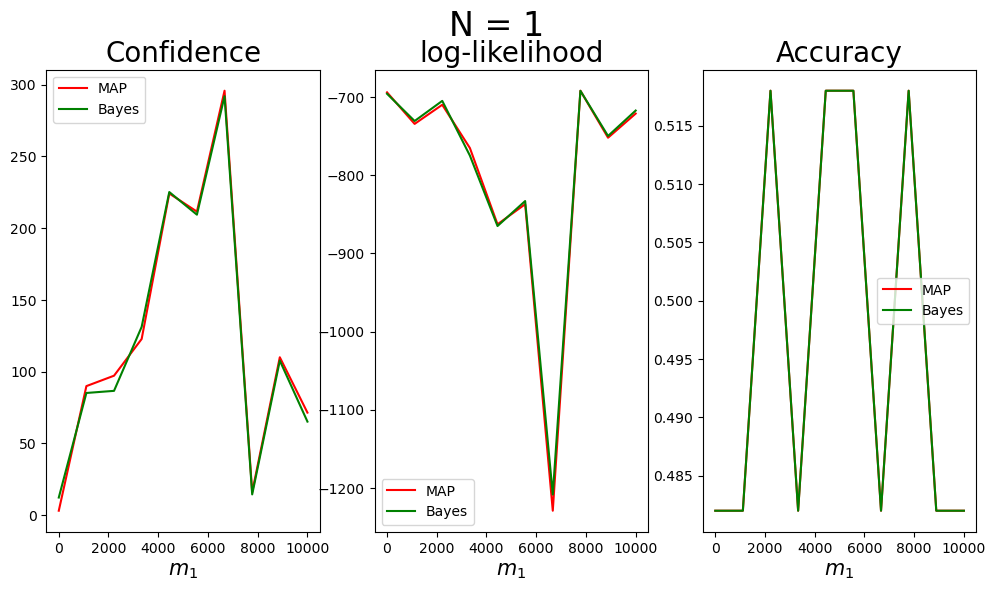

In [91]:
plot_fig(m1s, conf_map, conf_bayes, loglike_map, loglike_bayes, acc_map, acc_bayes, n)

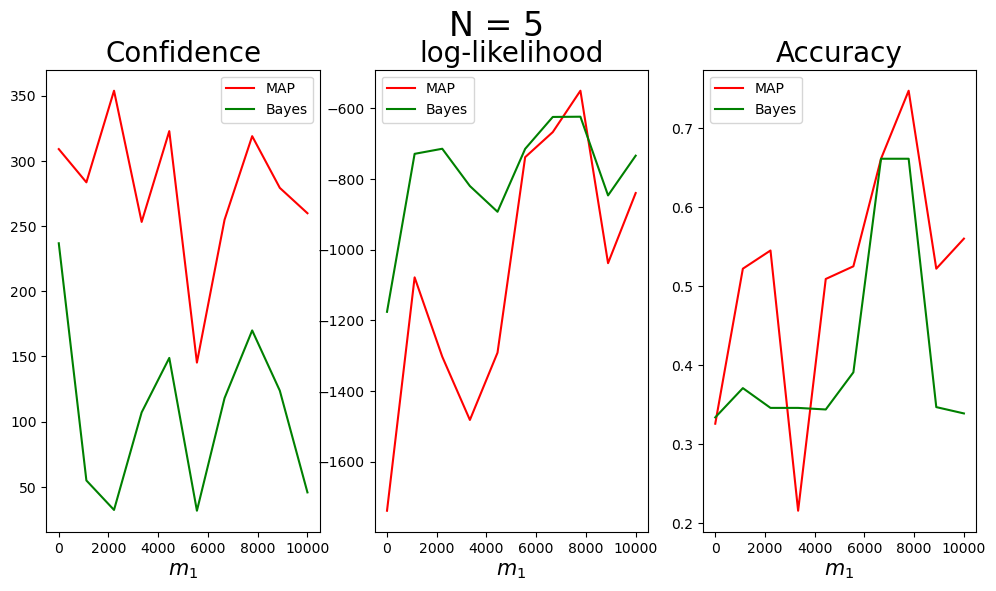

In [93]:
plot_fig(m1s, conf_map, conf_bayes, loglike_map, loglike_bayes, acc_map, acc_bayes, n)

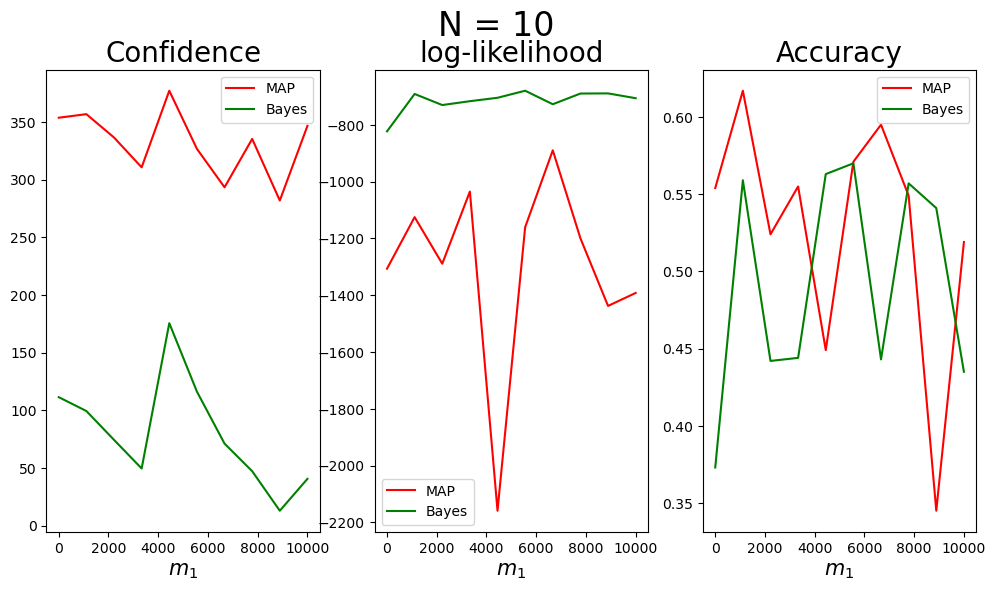

In [95]:
plot_fig(m1s, conf_map, conf_bayes, loglike_map, loglike_bayes, acc_map, acc_bayes, n)

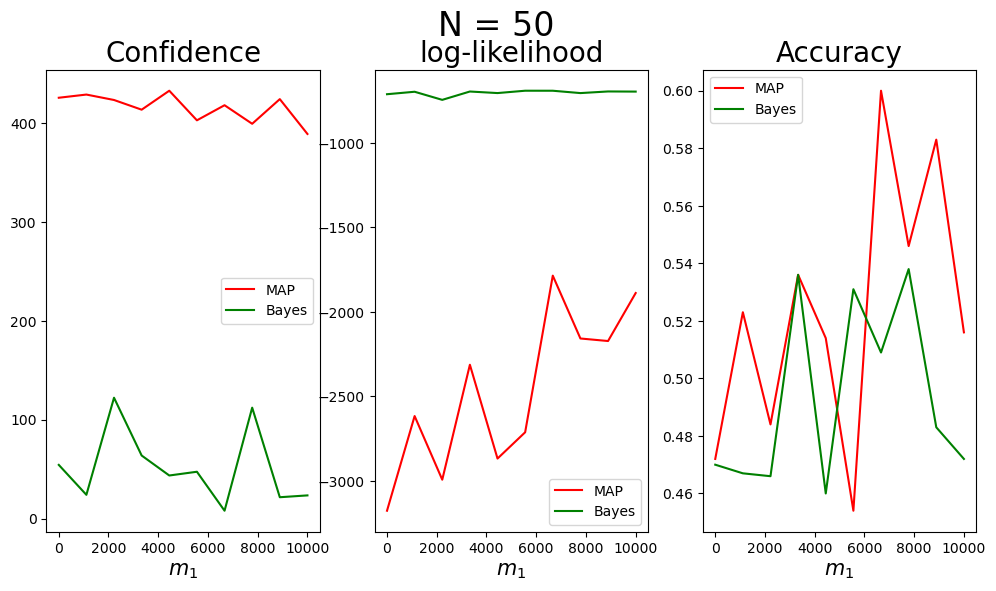

In [81]:
plot_fig(m1s, conf_map, conf_bayes, loglike_map, loglike_bayes, acc_map, acc_bayes, n)

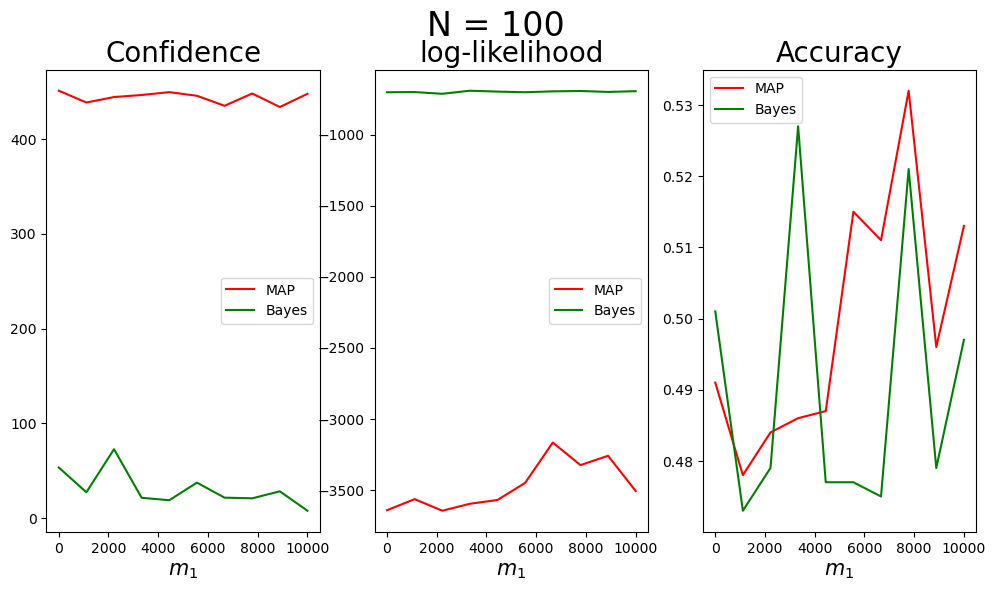

In [77]:
plot_fig(m1s, conf_map, conf_bayes, loglike_map, loglike_bayes, acc_map, acc_bayes, n)

Вывод: как мы видим, у разных методов модет быть разная уверенность в том, что они максимизирует, у Байеса маленький confidence, но большой likelihood, потому что он его и максимизирует, а $w_{MAP}$ маленький likelihood, но очень большой confidence, причем на маленьких размерах они совпадают, а вот на больших уже есть отличие, я подозреваю, что все таки это дело в вычислительной ошибке, а не в том, что они максимизируют, т.к. обратную матрицу уже не так легко посчитать, да и при log-likelihood вылезают Наны. Но есть соображения о том, что на малых величинах они дают примерно одинаковую величину во всех метриках. А вот на больших размерностях интегральчик так просто приближать не получится и стоит использовать наивный байеса, а не map-классификактор. 
Но вообще это всё такие танцы с бубном, в этот раз получим это, на другом сиде получим другое, на другое другое, на 3-м четвертое. А мб просто ошибка в коде у меня.

## Задача 2

Пусть имеется модель линейной регрессии с нормальным шумом:
$$
y = Xw + \varepsilon, \varepsilon \sim \mathcal{N}(0, \sigma^2 I)
$$,
где $\sigma^2$ - известно, и априорным распределением на w, $p(w) = \mathcal{N} (w | m, diag(s))$, где $m$ и $diag(s)$ - неивестные гиперпараметры.


1. Выписать совместное правдоподобие $p(y, w |X, m, s)$, задающее вероятностную модель.

Если $\sigma = 0$, то шум не вносит ничего поэтому рассматривать этот случай не представляет интереса.

$$
p(y, w | X, m, s) = p(y | X , w)\cdot p(w|m, s) = \mathcal{N}(y|Xw, \sigma^2 I_n) \mathcal{N}(w | m, diag(s)) = 
$$
$$
= \frac{1}{(2 \pi \sigma^2)^{\frac{n}{2}}} \exp \left( 
    -\frac{1}{2 \sigma^2} (y - Xw)^T(y - Xw) \right)
    \cdot \frac{1}{(2 \pi)^{\frac{n}{2}} \prod\limits_{i=1}^n s_i } \exp \left( -\frac{1}{2} (w-m)^T \left(diag(s) \right)^{-1}(w-m)\right)
$$

2. Используя формулу Байеса:
$$
p(w|X, y, m, s) = \frac{p(y, w | X, m, s)}{p(y|X, m, s)} = \frac{p(y|X, w) p(w|m, s)}{\int p(y|X, \theta) p(\theta|m, s) d \theta} \propto p(y|X, w) p(w|m, s)
$$
Пролагарифмируем это, учитывая, что логарифм произведения это сумма логарифмов, и посмотрев на равенство в прошлом пункте получим:

$$
\log p(w|X, y, m, s) \propto -\frac{1}{2 \sigma^2} (y-Xw)^T(y-Xw) - \frac{1}{2}(w-m)^T\left(diag(s)\right)^{-1}(w-m)
$$

Априорное и совместное распределения сопряжены, поэтому апостериорное распределение тоже будет нормальным и иметь следующий вид:
$$
\log p(w|X, y, m, s) \propto -\frac{1}{2}(w-\mu)^T \Sigma^{-1} (w-\mu)
$$,
где $\Sigma = \left(\frac{1}{\sigma^2}X^TX + (diag(s))^{-1} \right)^{-1}$,
$\mu = \Sigma \left(\frac{1}{\sigma^2}X^Ty + \left(diag(s) \right)^{-1}m \right)$

$$
p(w|X, y, m, s) = \mathcal{N}(\mu, \Sigma)
$$

Если же $s_i \rightarrow 0$, то у нас $w_i$ почти наверное равен константе $,m_i$, это мы и можем наблюдать, взглянув на матрицу $\Sigma$, где он тоже вырождается в константу, сделав точный байесовский прогноз, вес будет равен константе $m_i$.

Можно ещё записать оценку на $w_{map}$, $w_{map} = \argmax_{w} p(w|X, y, m, s) = \mu$

3. Решить задачу максимизации обоснованности.

$$
p(y|X, m, s) = \int p(y|X, w)p(w|m, diag(s))dw
$$
по гиперпараметрам $m$ и $s$. Какой вывод можно сделать из полученного результата?

Кайфанем от $EM-алгоритма$:
$$
F(q, m, s) = -\int q(w)\log q(w) dw + \int q(w) \log p(y, w|X, m, s)dw =
$$
$$
= \log p(y|X, m, s) - D_{KL}(q(w) || p(w|X, y, m, s))
$$
Запишем Е-шаг, где m и s будем считать фиксированными:
$$
F(q, m, s) \rightarrow \max_{q} \Leftrightarrow q(w) = p(w|X, y, m, s) = \mathcal{N} (\mu, \Sigma)
$$

Запишем M-шаг, где $q(w)$ считаем фиксированным:
$$
\mathbb{E}_{q(w)} \log p(y,w |X, m, s) = \int q(w)\log p(y, w|X, m, s) dw \rightarrow \max_{m, s}
$$
$$
\hat{F} (m, s) = \mathbb{E} \log p(y,w |X, m, s) = \mathbb{E}_{q(w)} \log p(y|X, w) + \mathbb{E}_{q(w)} \log p(w, m, s) \propto
$$

$$
\propto -\frac{1}{2\sigma^2} \mathbb{E}_{q(w)} ||y-Xw||_2^2 - \frac{1}{2} \sum\limits_{i=1}^n \log s_i -\frac{1}{2} \mathbb{E}_{q(w)} \left( (w-m)^T \left(diag(s)\right)^{-1} (w-m)\right) = 
$$

$$
= -\frac{1}{2 \sigma^2} \mathbb{E}_{q(w)} ||y-Xw||_2^2 - \frac{1}{2} \sum\limits_{i=1}^n \log s_i - \frac{1}{2} \sum\limits_{i=1}^n \frac{\mathbb{E}_{q(w)} (w_i - m_i)^2}{s_i}
$$
Так как тут очевидно, что это выпуклая функция, то легко найдем минмум нашей функции, взяв производные и приравняв их к нулю.

$$
\frac{\partial \hat{F}}{\partial m_i} = -\frac{1}{s_i} \mathbb{E}_{q(w)} (w_i - m_i) = 0 \Leftrightarrow m_i = \mathbb{E}_{q(w)} w_i = \mu_i
$$

$$
\frac{\partial \hat{F}}{\partial s_i} = -\frac{1}{2s_i} + \frac{1}{2s_i^2} \mathbb{E}_{q(w)} (w_i - m_i)^2 \Leftrightarrow s_i = \mathbb{E}_{q(w)} (w_i-\mu_i) = \mathbb{D} w_i
$$

Нашли m и s:
$$
m = \left(\frac{1}{\sigma^2} X^TX + \left(diag(s) \right)^{-1} \right)^{-1} \left(\frac{1}{\sigma^2} X^Ty + \left(diag(s) \right)^{-1}m \right),
$$
откуда
$$
m = (X^T X)^{-1} X^T y
$$

$$
s_i = \left( \left(\frac{1}{\sigma^2} X^TX + \left(diag(s)\right)^{-1} \right)^{-1} \right)_{ii}
$$

Получили, что решение задачи оптимизации совпадает с максимумом обоснованности, когда $w$ имеет нормальное распределение с математическим ожиданием.


## Задача 3.
Пусть имеется две двухсторонние монеты, случайно и независимые выбранные из всех существующих монет достоинством в 2 рубля. Пусть было произведено $n_1 = 10$ бросаний первой монеты и $n_2 = 10000$ бросаний второй. Среди $n_1 = 10$ результатов бросания первой монеты было $k_1 = 3$ орла, а среди $n_2 = 10000$ бросаний второй $k_2 = 5100$ орлов.

1. Построить вероятностную модель эксперимента, записав правдоподобие и введя апроирные распределения на вероятности $p_1$ и $p_2$ выпадания орлов для первой и второй монеты соотвественно. Опишите, как и из каких соображений Вы выбрали априорные распределения $q(p_1)$ и $q(p_2)$.

Запишем правдоподобие:
$$
q(k_1, k_2, p_1, p_2|n_1, n_2) = q(k_1|n_1, p_1)q(k_2|n_2, p_2)q(p_1)q(p_2)
$$
Так как мы ничего не знаем про монету, кроме того, что на ребро она не может падать и вероятность вывпадения от 0 до 1, то будем считать, что $q(p_1) = q(p_2) = U(0, 1)$.
2. Получить апостериорные распределения $q(p_1|k_1, n_1)$ и $q(p_2|k_2, n_2)$.
Используем формулу Байеса:
$$
q(p_1|k_1, n_1) = \frac{q(k_1, p_1|n_1)}{q(k_1|n_1)} = \frac{q(k_1|n_1, p_1)q(p_1)}{q(k_1|n_1)}
$$

$$
q(k_1|n_1, p_1)= C_{n_1}^{k_1}p_1^{k_1}(1-p_1)^{n_1 - k_1}
$$
$$
q(k_1|n_1) = \int q(k_1|n_1, \theta_1) q(\theta_1) d \theta_1 = \int\limits_{i=0}^{1} C_{n_1}^{k_1} \theta_1^{k_1}(1-\theta_1)^{n_1-k_1} d \theta_1 = C_{n_1}^{k_1} \mathcal{B}(k_1+1, n_1-k_1+1)
$$
, где $\mathcal{B}(\alpha, \beta)$ - бета функция.
Получаем:
$$
q(p_1|k_1, n_1) = \mathcal{B}(k_1+1, n_1-k_1+1)
$$
$$
q(p_2|k_2, n_2) = \mathcal{B}(k_2 + 1, n_2-k_2+1)
$$

3. Пусть теперь рассматривается две вероятностные модели: $M_1$ с $p_1=p_2=p$ и априорным распределением, которые было ранее выбрано Вами для $p_1$ и полная модель $M_2$ из пункта 1., где $p_1$ и $p_2$ априорно выбраны независимо из $q(p_1)$ и $q(p_2)$. Сосчитать апостериорную вероятность обеих моделей, считая их априори равновероятными ($p(M_1) = p(M_2) = 0.5$). Какой вывод можно сделать из результата?

Общая модель будет выглядеть следующим образом:
$$
q(k_1, k_2, p_1, p_2, M_i|n_1, n_2) = q_i(k_1, k_2, p_1, p_2|n_1, n_2)p(M_i)
$$
Запишем апостериорную вероятности:
$$
p(M_i|k_1, k_2, n_1, n_2) = \frac{q(k_1, k_2, M_i|n_1, n_2)}{q(k_1, k_2|n_1, n_2)} = \frac{q_i(k_1, k_2|n_1, n_2)p(M_i)}{q(k_1, k_2|n_1, n_2)}
$$

Рассмотрим знаменатель там всё просто:
$$
q(k_1, k_2|n_1, n_2) = p(M_1)q_1(k_1, k_2, n_1, n_2) + p(M_2)q_2(k_1, k_2|n_1, n_2)
$$

Теперь выразим первый множитель:
$$
q_1(k_1, k_2|n_1, n_2) = \int q_1(k_1, k_2|n_1, n_2, p)q(p)dp = \int\limits_{0}^{1} C_{n_1}^{k_1} C_{n_2}^{k_2} p^{k_1+k_2}(1-p)^{n_1+n_2 -k_1-k_2}dp =
$$
$$
= C_{n_1}^{k_1}C_{n_2}^{k_2}\mathcal{B}(k_1+k_2+1, n_1+n_2-k_1-k_2+1)
$$
Выразим второй множитель:
$$
q_2(k_1, k_2|n_1, n_2) = \int\int q_2(k_1, k_2|n_1, n_2, p_1, p_2)q(p_1)q(p_2)dp_1 dp_2 = \int\limits_{0}^1 C_{n_1}^{k_1}p_1^{k_1}(1-p_1)^{n_1-k_1}dp_1 \int\limits_{0}^{1} C_{n_2}^{k_2}p_2^{k_2}(1-p_2)^{n_2-k_2}dp_2 =
$$

$$
= C_{n_1}^{k_1}C_{n_2}^{k_2}\mathcal{B}(k_1+1, n_1-k_1+1)\mathcal{B}(k_2 + 1, n_2-k_2+1)
$$
Выразим апостериорные вероятности на модели:
$$
p(M_1|k_1, k_2, n_1, n_2) = \frac{\mathcal{B}(k_1+k_2+1, n_1+n_2-k_1-k_2+1)}{\mathcal{B}(k_1+k_2+1, n_1+n_2-k_1-k_2+1) + \mathcal{B}(k_1+1, n_1-k_1+1)\mathcal{B}(k_2+1, n_2-k_2+1)}
$$

$$
p(M_2|k_1, k_2, n_1, n_2) = \frac{\mathcal{B}(k_1+1, n_1-k_1+1)\mathcal{B}(k_2+1, n_2-k_2+1)}{\mathcal{B}(k_1+k_2+1, n_1+n_2-k_1-k_2+1) + \mathcal{B}(k_1+1, n_1-k_1+1)\mathcal{B}(k_2+1, n_2-k_2+1)}
$$
Вычисления их приведены ниже:

In [260]:
#Посчитаем эти шикарные выражения
from scipy.special import beta
n1, n2 = 10, 10000
k1, k2 = 3, 5100
part1 = beta(k1+k2+1, n1+n2-k1-k2+1)
part2 = beta(k1+1, n1-k1+1)*beta(k2+1, n2-k2+1)
p1 = part1/(part1+part2)
p1 = part2/(part1+part2)
print(f"P(M_1|k_1, k_2, n_1, n_2) = {p1}")
print(f"P(M_2|k_1, k_2, n_1, n_2) = {p2}")


P(M_1|k_1, k_2, n_1, n_2) = nan
P(M_2|k_1, k_2, n_1, n_2) = nan


C:\Users\KreininMV\AppData\Local\Temp\ipykernel_4892\3812622076.py:7: RuntimeWarning: invalid value encountered in double_scalars
  p1 = part1/(part1+part2)
C:\Users\KreininMV\AppData\Local\Temp\ipykernel_4892\3812622076.py:8: RuntimeWarning: invalid value encountered in double_scalars
  p1 = part2/(part1+part2)


Как видим питончик не справляется с этим, длинная математика не помогла, попробуем в фольфраме
$$
p(M_1|k_1, k_2, n_1, n_2) \approx 0.543
$$
$$
p(M_2|k_1, k_2, n_1, n_2) \approx 0.457
$$

Получили, что апостериорная вероятность простой модели будет больше, чем сложной (конкретно на нашей выборке, если поварьировать параметры, то можно получить другие числа), и эта модель получилась более обоснованной, но опять же это только на наших параметрах.

## Задача 4
1. Что такое дивергенция Кульбака-Лейблера (KL-divergence), что она показывает и когда она определена?
Это чатсный случай f-расхождения и расхождений Брэгмана, или же неотрицательный функционал, который является мерой удаленности друг от друга двух вероятностных распределений, которые определены на общем пространстве элементарных событий, причем он не симметричный и не удовлетворяет неравенству треугольника, но она является безразмерной величиной и не зависит от размерности случайных величин.

Вот формула для дискретных распределений (если $q_i = 0$, то $p_i = 0$):
$$
D_{KL}(P||Q) = \sum\limits_{i=1}^n p_i \log{\frac{p_i}{q_i}}
$$

Вот для абсолютно-непрерывных распределений с функциями плотности $p(x), q(x)$, (если $q(x) = 0$, то $p(x) = 0$):
$$
D_{KL}(P||Q) = \int\limits_{\Omega} p(x) \log{\frac{p(x)}{q(x)}} dx
$$

А есть ещё хайповый случай для многомерного нормального распределения со средними $\mu_0, \mu_1$ и матрицами ковариации $\Sigma_0, \Sigma_1$, который я использовал в практической домашке:
$$
D_{KL}(\mathcal{N}_0|\mathcal{N_1}) = \frac{1}{2}\left(tr\left(\Sigma_1^{-1}\Sigma_{0} \right) + (\mu_1 - \mu_0)^T \Sigma_1^{-1} (\mu_1 - \mu_0) - k + \log{\left(\frac{\det{\Sigma_1}}{\det{\Sigma_0}} \right)} \right)
$$


2. Докажите, что значение дивергенции Кульбака-Лейблера неотрицательно.

Начнем с дискретного случая:
$$
D_{KL}(P||Q) = \sum\limits_{i=1}^n p_i \log{\frac{p_i}{q_i}} = -\sum\limits_{i=1}^n p_i \log{\frac{q_i}{p_i}} \geq
$$
(Ура, неравенство Йенсена и условие на то, что сумма $\sum p_i = 1$, и $\sum q_i = 1$)

$$
\geq - \log{\left(\sum\limits_{i=1}^n p_i \frac{q_i}{p_i}\right)} = - \log{\left(\sum\limits_{i=1}^n q_i \right)} = 0
$$

Теперь перейдем к доквазательству абсолютно-непрерывного случая, здесь сумма $p_i и q_i$ заменяется на интеграл по множеству, и нарвенство Йенсена уже в интегральной формуле для вогнутой функции:

$$
D_{KL}(P||Q) = \int p(x) \log{\frac{p(x)}{q(x)}} dx = - \int p(x) \log{\frac{q(x)}{p(x)}} dx \geq - \log{\left( \int p(x)\frac{q(x)}{p(x)} dx\right)} = 0
$$

3. Пусть у Вас есть две модели логистической регрессии с равномерными априорным псевдораспределением на параметр $w$, оцененные на двух разных выборках $(X_1, y_1)$ и $(X_2, y_2)$, с одинаковым набором из двух признаков. Пусть апостериорные распределение для первой выборки:
$$
w \sim \mathcal{N}\left(w | [1, 1]^T, \begin{pmatrix}
1 & 0 \\
0 & 1 
\end{pmatrix} \right)
$$,
а для второй выборки:
$$
w \sim \mathcal{N}\left(w | [-8, -3]^T, \begin{pmatrix}
10000 & 0 \\
0 & 2000 
\end{pmatrix} \right)
$$
Считая, что выборки сгенерированы с помощью модели логистической регрессии, можно ли с уверенностью утверждать, что истинные векторы параметров этих моделей $w_1$ и $w_2$ разные?

Не знаю можно ли использовать готовую формулу из википедии, но мне постоянно снижают баллы, поэтому давайте выведем её:
$$
D_{KL}(\mathcal{N}_0|\mathcal{N}_1) = \int p(w) \log{\frac{p(w)}{q(w)}}dw = \mathbb{E}_{p(w)} \log{\frac{p(w)}{q(w)}} = \mathbb{E}_{p(w)} \left( \log{p(w)} - \log{q(w)} \right) = 
$$
$$
= \frac{1}{2} \mathbb{E}_{p(w)} \left( 
    \log{\det{\Sigma_0}} - (w-\mu_0)^T \Sigma_0^{-1}(w-\mu_0) + \log{\det{\Sigma_1}} + (w-\mu_1)^T\Sigma_1^{-1}(w-\mu_1) \right) = 
$$

$$
= \frac{1}{2} \log{\frac{\det{\Sigma_1}}{\det{\Sigma_0}}} + \frac{1}{2} \mathbb{E}_{p(w)}\left( -(w-\mu_0)^T \Sigma_0 (w-\mu_0) + (w-\mu_1)^T \Sigma_1^{-1} (w-\mu_1)\right) = 
$$

$$
= \frac{1}{2} \log{\frac{\det{\Sigma_1}}{\det{\Sigma_0}}} + \frac{1}{2} \mathbb{E}_{p(w)} \left(-tr\left(\Sigma_0^{-1} (w-\mu_0)(w-\mu_0)^T \right) + tr\left(\Sigma_1^{-1} (w-\mu_1)(w-\mu_1)^T \right)\right) = 
$$

$$
= \frac{1}{2} \log{\frac{\det{\Sigma_1}}{\det{\Sigma_0}}} - \frac{1}{2} tr\left(\Sigma_0^{-1} \Sigma_0 \right) + \frac{1}{2} \mathbb{E}_{p(w)}\left( 
    tr\left(\Sigma_1^{-1}(ww^T - 2w \mu_1^T +\mu_1 \mu_1^T) \right)\right) - \frac{1}{2} \mathbb
    {E}_{p(w)}\left( 
    tr\left(\Sigma_0^{-1}(ww^T - 2w \mu_0^T +\mu_0\mu_0^T) \right)
\right) = 
$$

$$
= \frac{1}{2} \log{\frac{\det{\Sigma_1}}{\det{\Sigma_0}}} - \frac{1}{2}k + \frac{1}{2} tr \left( 
    \Sigma_1^{-1}(\Sigma_0 + \mu_0\mu_0^T - 2\mu_0\mu_1 + \mu_1\mu_1^T) \right) =
$$

$$
= \frac{1}{2} \left(\log{\frac{\det{\Sigma_1}}{\det{\Sigma_0}}} - k + tr(\Sigma_1^{-1} \Sigma_0) + tr\left( 
    \mu_0\Sigma_1^{-1}\mu_0 - 2\mu_0^T\Sigma_1^{-1}\mu_1 + \mu_1^T\Sigma_1^{-1}\mu_1
\right) \right) =
$$

$$
= \frac{1}{2} \left(\log{\frac{\det{\Sigma_1}}{\det{\Sigma_0}}} -k + tr\left(\Sigma_1^{-1}\Sigma_0 \right) + (\mu_1 - \mu_0)^T\Sigma_1^{-1}(\mu_1 - \mu_0)\right)
$$

Класс получили формулу из Википедии!

In [13]:
import torch
def get_KL(mu0, sigma0, mu1, sigma1):
    return 0.5*(torch.log(torch.linalg.det(sigma1)/torch.linalg.det(sigma0)) 
                - mu0.shape[0] 
                + torch.trace(torch.linalg.inv(sigma1) @ sigma0) 
                + (mu1 - mu0)@torch.linalg.inv(sigma1) @ (mu1 - mu0)).item()
mu0 = torch.tensor([1., 1])
sigma0 = torch.tensor([[1., 0], [0, 1]])
mu1 = torch.tensor([-8., -3])
sigma1 = torch.tensor([[10000., 0], [0, 2000]])

In [15]:

print(f'KL(N0|N1) = {round(get_KL(mu0, sigma0, mu1, sigma1), 2)}')
print(f'KL(N1|N0) = {round(get_KL(mu1, sigma1, mu0, sigma0), 2)}')


KL(N0|N1) = 7.41
KL(N1|N0) = 6039.09


Показали свойство несимметричности. По опыту из практической домашки такие большие значения дивергенции не информативны, хотя, вроде как, должно показывать что эти векторы очень сильно различны, но практика говорит о том, что есть какой-то подвох, давайте подсчитаем $s_{score}$, про который рассказывали на последних лекциях (я так понимаю его надо было использовать в практической домашке).

$s_{score}(\mathcal{N}_0, \mathcal{N}_1) = \exp\left(-0.5 (\mu_0 - \mu_1)^T (\Sigma_0 + \Sigma_1)^{-1} (\mu_0 - \mu_1) \right)$

In [20]:
def get_score(mu0, sigma0, mu1, sigma1):
    return torch.exp(-0.5*(mu0 - mu1).T @ torch.linalg.inv(sigma0 + sigma1) @ (mu0 - mu1)).item()
print(f's(N0, N1) = {round(get_score(mu0, sigma0, mu1, sigma1), 2)}')

s(N0, N1) = 0.99


Получается, что её стоило использовать для практической домашки, она корректна показывает, что распределения очень схожи, а дивергенция получилась такая из-за очень большой апостериорной ковариацинной матрицы. Так что они похожи, а не различны. На это была расчитана практическая часть? На то что мы заглянем вперед?